# Metastasis Dynamics Modeled with Two Boolean Network Models

We start by instantiating both the full and reduced models using our MetastasisModel class, allowing for simple efficient initialization.

In [1]:
from metastasisModel import MetastasisModel

full_model = MetastasisModel()
reduced_model = MetastasisModel(modular=True)

We visualize the interaction graph of the reduced model efficiently in multiple ways. 

Number of Modules: 20


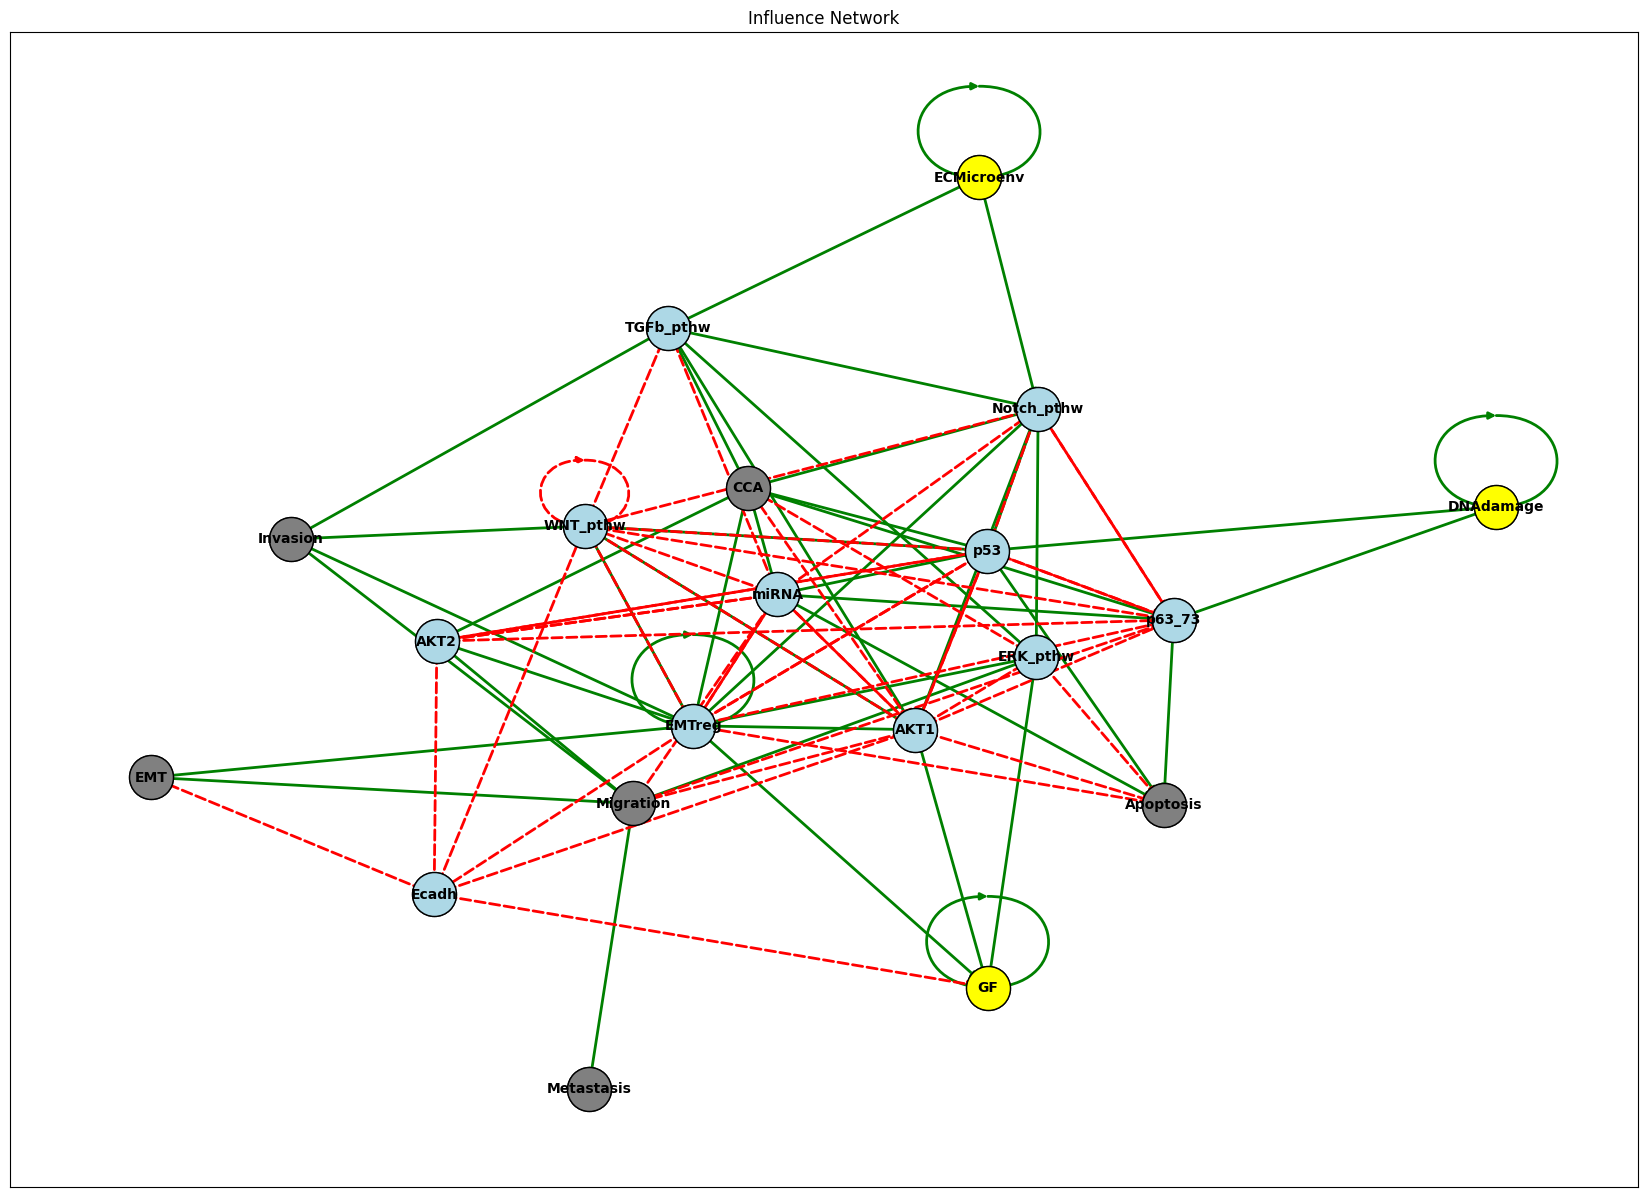

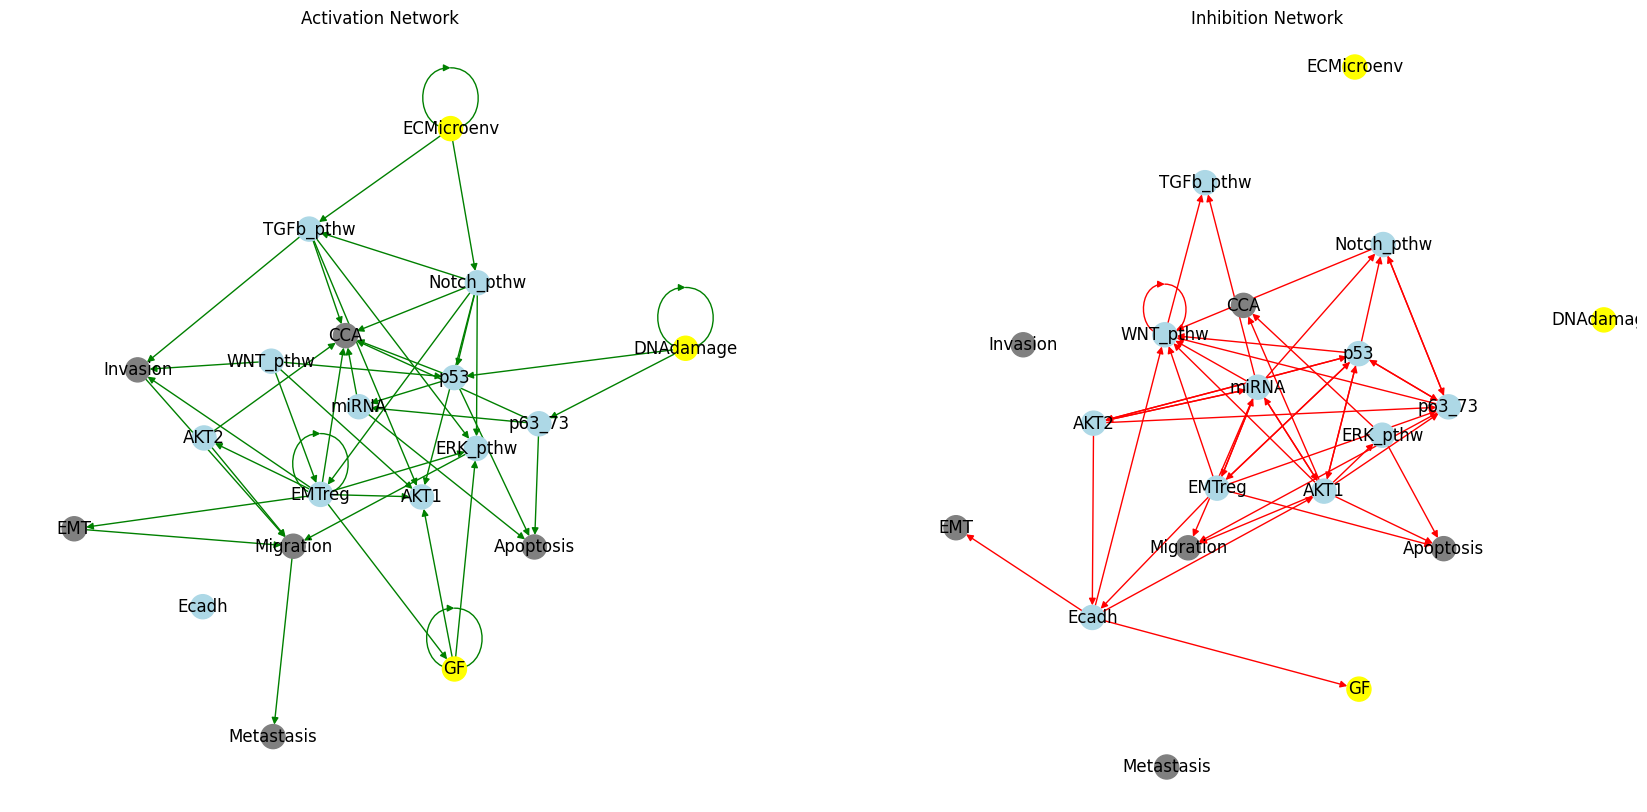

In [3]:
print(f"Number of Modules: {len(reduced_model.variables)}")

reduced_model.draw_interaction_graph('reduced_model', split=True, interactive=False, show=True)

Most notably, an interactive HTML representation of the network could be accessed in browser.

In [4]:
reduced_model.draw_interaction_graph('reduced_model', split=False, interactive=True, show=False)

Drawing interactive network...
c:\Users\user\Desktop\GENIOMHE\Period3\Modeling\BoolNet-Metastasis-Model\plots/reduced_model_interactive_interactions_network.html


Next, we identify stable states and plot them.

In [8]:
reduced_model.get_stable_states_df(display=True)
reduced_model.identify_active_nodes()

Variables      HS    EMT2    Apop2    Apop1    EMT1    Apop4    Apop3    M2    M1
-----------  ----  ------  -------  -------  ------  -------  -------  ----  ----
EMTreg          0       1        0        0       1        0        0     1     1
Apoptosis       0       0        1        1       0        1        1     0     0
CCA             0       1        1        1       1        1        1     1     1
ECMicroenv      0       0        0        0       0        1        1     1     1
Notch_pthw      0       0        0        0       0        0        0     1     1
AKT2            0       1        0        0       1        0        0     1     1
Invasion        0       0        0        0       0        0        0     1     1
TGFb_pthw       0       0        0        0       0        0        0     1     1
GF              0       1        0        0       1        0        0     1     1
AKT1            0       0        0        0       0        0        0     0     0
p63_73          

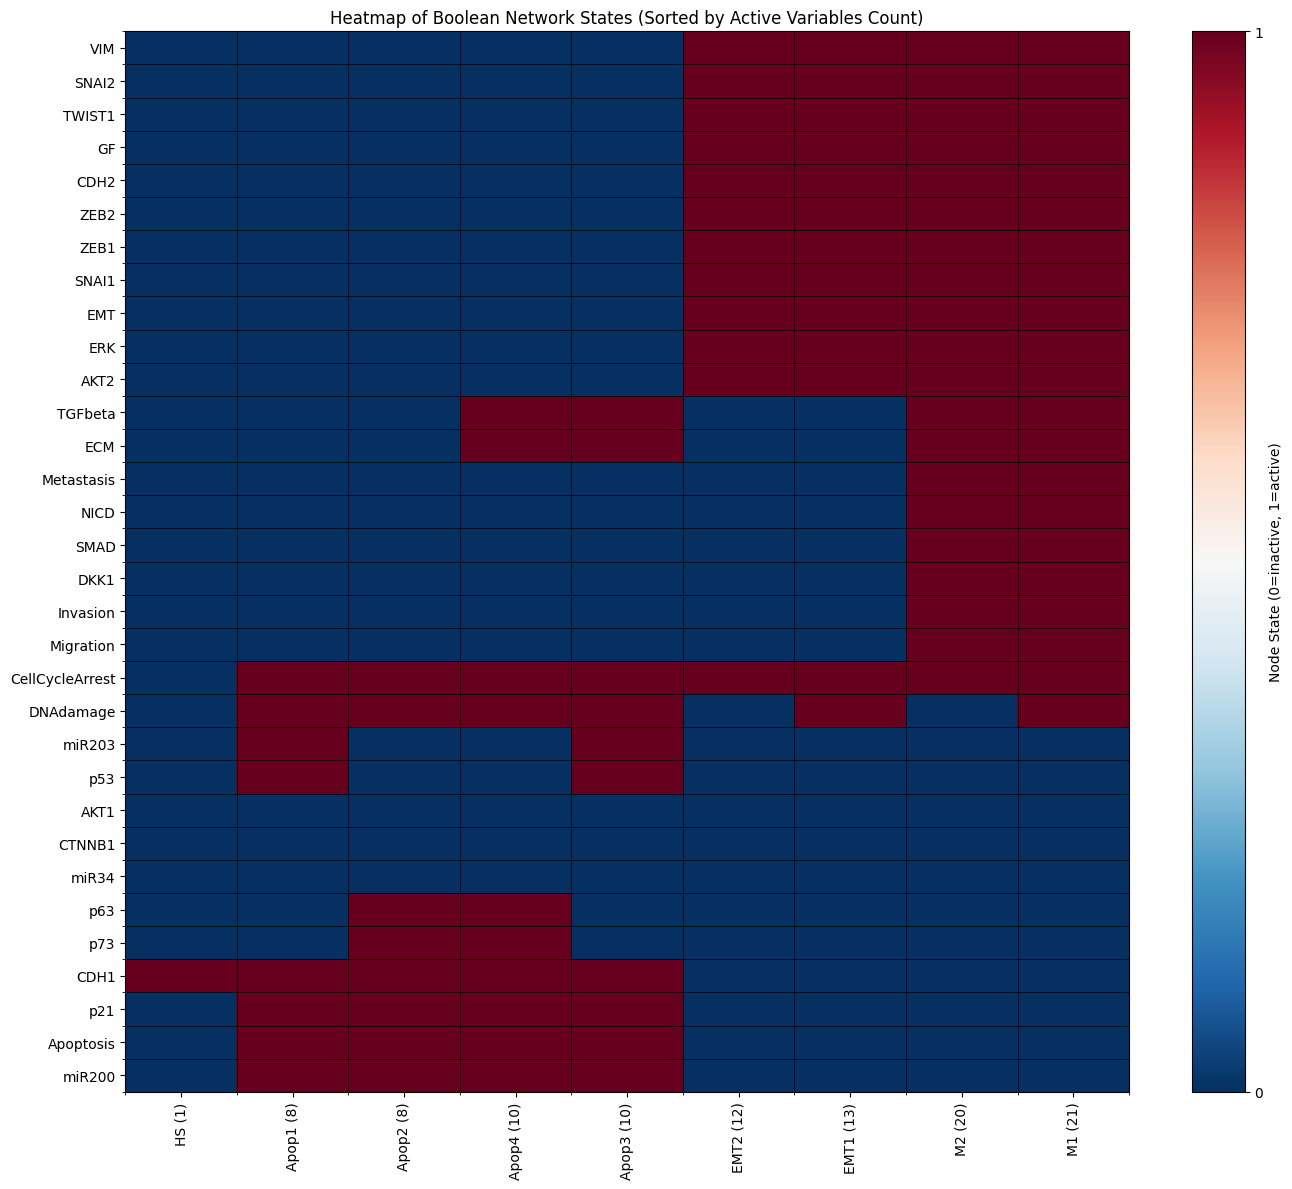

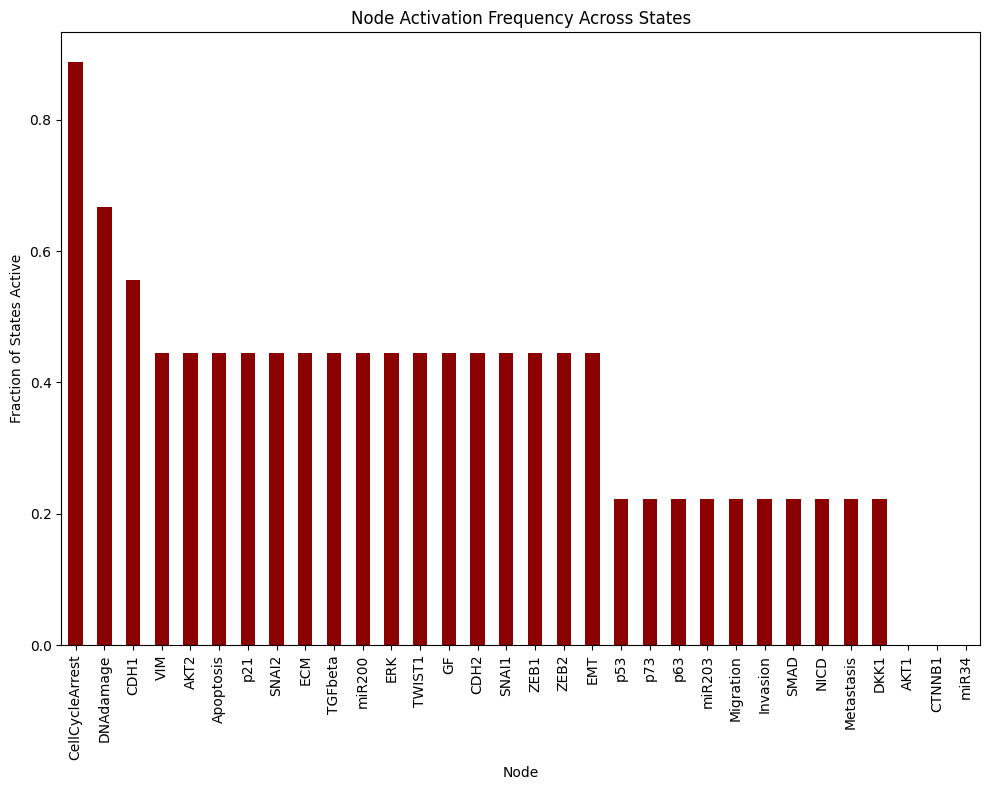

In [13]:

reduced_model.write_stable_states('reduced_model')
full_model.get_stable_states_df(display=False)
full_model.plot_stable_states('full_model', show=True)


As done by the authors, we check certain mutants to ensure that they will reach stable states in accordance with experimental data reported in previous papers. One example is highlighted below.

Variables      Apop2    EMT2    CCA    Apop4    EMT1    CCA_1    M2    M1
-----------  -------  ------  -----  -------  ------  -------  ----  ----
EMTreg             0       1      0        0       1        0     1     1
Apoptosis          1       0      0        1       0        0     0     0
CCA                1       1      1        1       1        1     1     1
ECMicroenv         0       0      0        1       0        1     1     1
Notch_pthw         0       0      0        0       0        0     1     1
Invasion           0       0      0        0       0        0     1     1
TGFb_pthw          0       0      0        0       0        0     1     1
GF                 0       1      1        0       1        1     1     1
p63_73             1       0      1        1       0        1     0     0
AKT1               0       0      0        0       0        0     0     0
AKT2               0       1      0        0       1        0     1     1
miRNA              1       0      1   

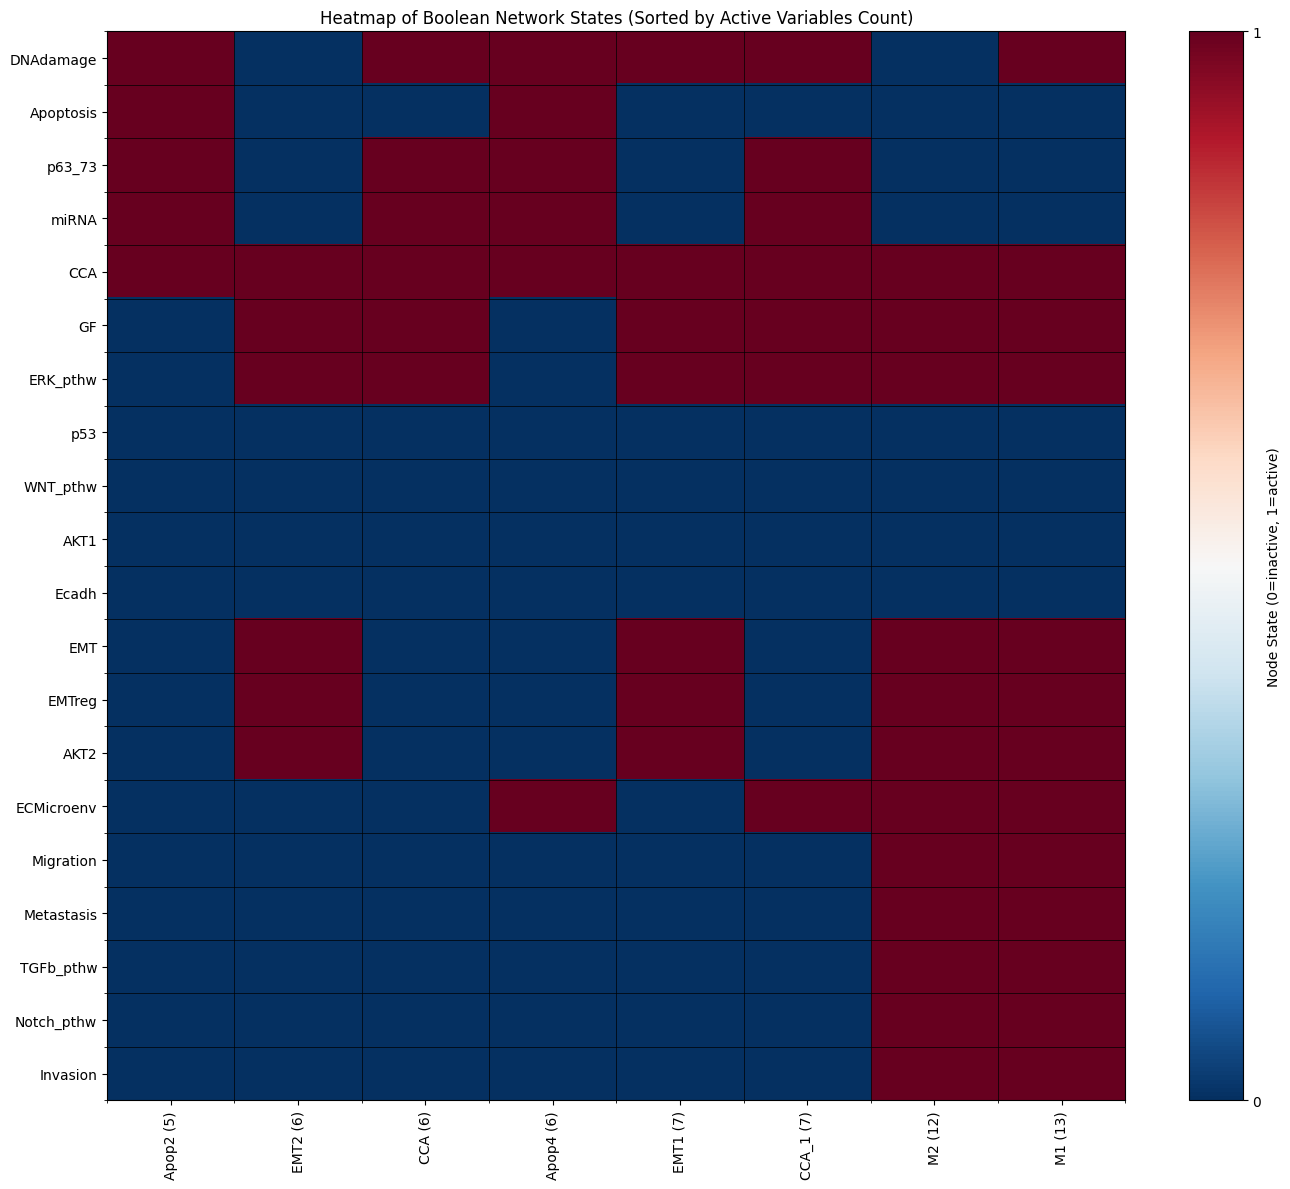

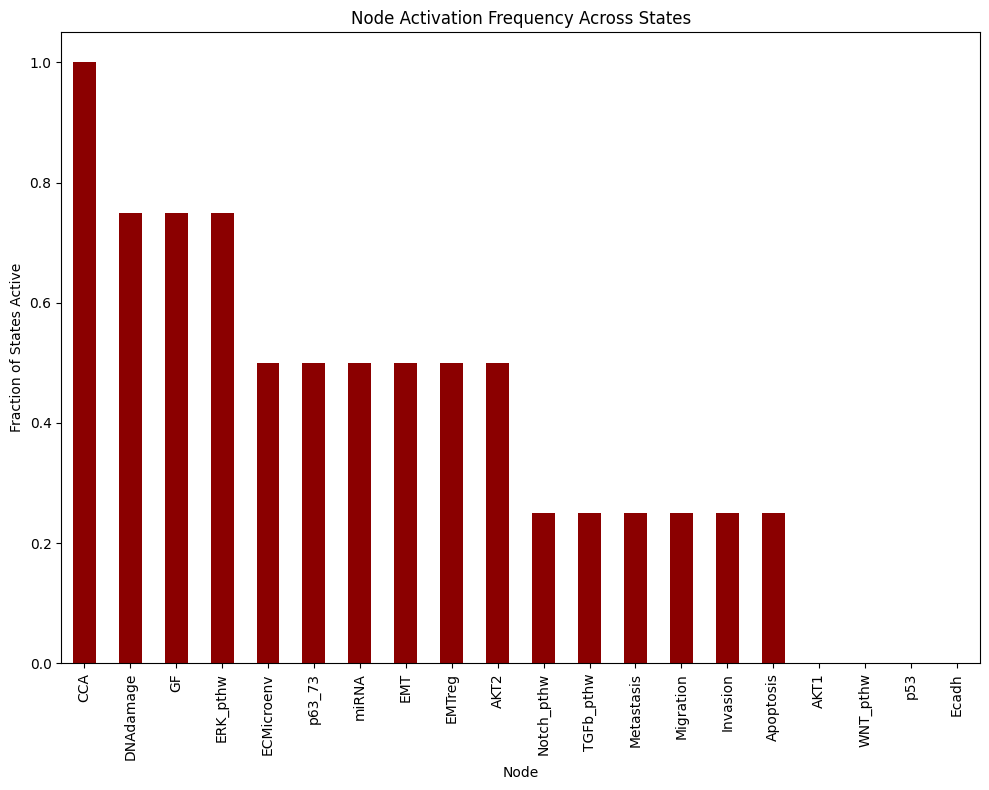

In [17]:
mutated_model = reduced_model.control(frozenfalse={'p53','Ecadh'})
mutated_model.get_stable_states_df(display=True)
# mutated_model.write_stable_states('second_mutated_model')
mutated_model.plot_stable_states('second_mutated_model', show=True)

We provide a controllability analysis functionality to assess GoF/LoF for all variables.

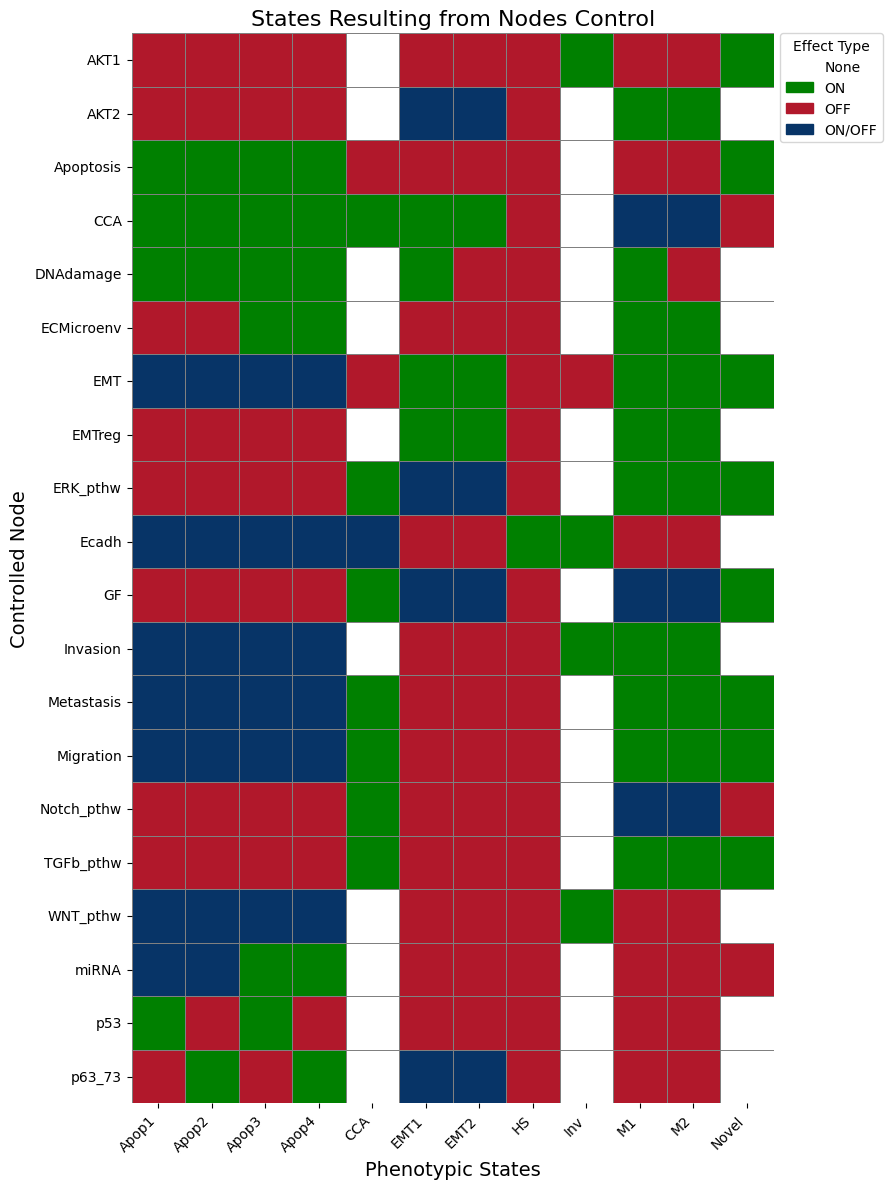

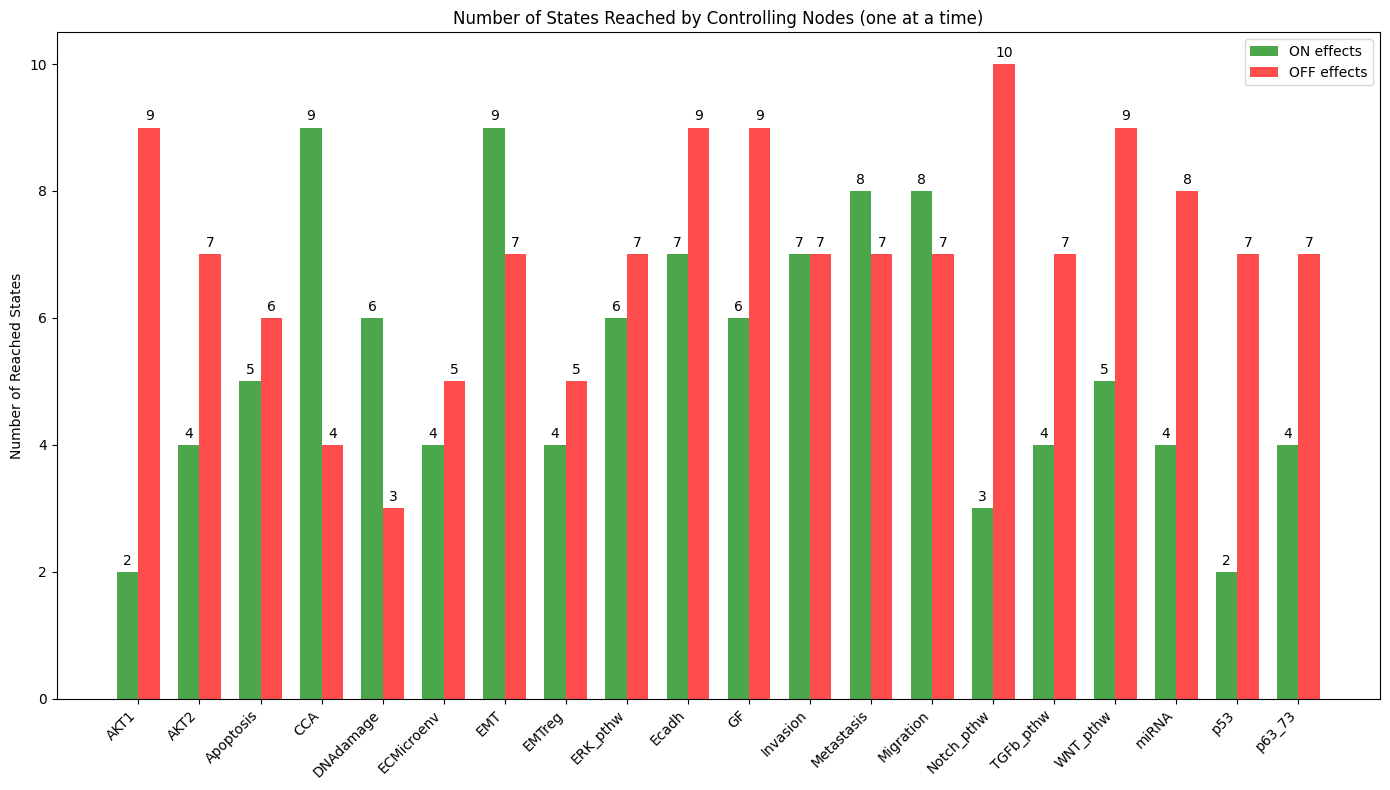

In [19]:
reduced_model.controllability_analysis('reduced_model', prevent_duplicates=False, plot=True)

After obtaining and saving our huge state transition graph, we use it to identify attractors below, only considering SCCs with size > 1.

In [7]:
import pickle
import networkx as nx
with open('data_files/reduced_model_state_transition_graph.pkl', 'rb') as f:
    model = pickle.load(f)
print('model loaded')
scc = list(map(frozenset, nx.strongly_connected_components(model)))

comps=[]
for s in scc:
    if len(s) > 1:
        # print(s, len(s))
        comps.append(s)
    # print(s, len(s))
    
print(len(scc), 'strongly connected components')
print(len(comps), 'strongly connected components with more than one node')
print(2**20)

model loaded
1018292 strongly connected components
436 strongly connected components with more than one node
1048576


We note an interesting cyclic attractor that iterates between 4 states (discussed further in report).

In [8]:
eqs=reduced_model.model.equilibria(model=model,trace=True)

for eq in eqs:
    print(len(eq))

 BooN equilibria >> Completed                 
4
56
112
112
144
208
224


We verify the validity of certain cases in satisfying necessary queires we are interested in, after we did not manage to run BooN necessary for our model. For the 2 exmaples below, Metastasis is always reached and always prevented, respectively.

In [12]:
# full_model.necessary(trueset={'Metastasis'},max_cnf=200000, trace=True) 
mutated_model = full_model.control(frozentrue={'NICD'}, frozenfalse={'p53'})
mutated_model.get_stable_states_df(display=True)

Variables          M2    M1    M2_1    M1_1
---------------  ----  ----  ------  ------
miR203              0     0       0       0
ERK                 1     1       1       1
Apoptosis           0     0       0       0
Invasion            1     1       1       1
AKT2                1     1       1       1
TGFbeta             1     1       1       1
CellCycleArrest     1     1       1       1
CDH1                0     0       0       0
miR200              0     0       0       0
Migration           1     1       1       1
SNAI1               1     1       1       1
EMT                 1     1       1       1
CTNNB1              0     0       0       0
p53                 0     0       0       0
miR34               0     0       0       0
DKK1                1     1       1       1
ZEB1                1     1       1       1
ZEB2                1     1       1       1
CDH2                1     1       1       1
GF                  1     1       1       1
SMAD                1     1     

,M2,M1,M2_1,M1_1
Variables,,,,
miR203,False,False,False,False
ERK,True,True,True,True
Apoptosis,False,False,False,False
Invasion,True,True,True,True
AKT2,True,True,True,True
TGFbeta,True,True,True,True
CellCycleArrest,True,True,True,True
CDH1,False,False,False,False
miR200,False,False,False,False


In [13]:
mutated_model = full_model.control(frozentrue={'miR203'})
mutated_model.get_stable_states_df(display=True)

Variables          CCA    Apop1    Apop2    Apop3    Apop4
---------------  -----  -------  -------  -------  -------
miR203               1        1        1        1        1
ERK                  0        0        0        0        0
Apoptosis            0        1        1        1        1
Invasion             0        0        0        0        0
AKT2                 0        0        0        0        0
TGFbeta              0        0        0        1        1
CellCycleArrest      1        1        1        1        1
CDH1                 1        1        1        1        1
miR200               0        1        1        1        1
Migration            0        0        0        0        0
CTNNB1               0        0        0        0        0
EMT                  0        0        0        0        0
SNAI1                0        0        0        0        0
p53                  0        1        0        1        0
miR34                0        0        0        0       

,CCA,Apop1,Apop2,Apop3,Apop4
Variables,,,,,
miR203,True,True,True,True,True
ERK,False,False,False,False,False
Apoptosis,False,True,True,True,True
Invasion,False,False,False,False,False
AKT2,False,False,False,False,False
TGFbeta,False,False,False,True,True
CellCycleArrest,True,True,True,True,True
CDH1,True,True,True,True,True
miR200,False,True,True,True,True


We add a recursive method to change operators from And to Or, and vica versa, to assess model robustness.

Index([        TGFbeta,           miR34,            AKT2,           SNAI1,
            Metastasis,             p63, CellCycleArrest,             p21,
                  ZEB2,             p73,          TWIST1,           SNAI2,
                  CDH1,             ECM,          CTNNB1,             p53,
                   EMT,             VIM,            SMAD,       DNAdamage,
                   ERK,        Invasion,            ZEB1,          miR200,
                  NICD,              GF,            AKT1,       Migration,
             Apoptosis,          miR203,            CDH2,            DKK1,
               'Count'],
      dtype='object')
                  1   7   2   3   4   5   0   6   9
TGFbeta           0   1   0   1   0   0   1   1   1
miR34             0   0   0   0   0   0   0   0   0
AKT2              0   0   0   0   0   1   1   1   1
SNAI1             0   0   0   0   0   1   1   1   1
Metastasis        0   0   0   0   0   0   1   1   1
p63               0   0   1   1   0   0  

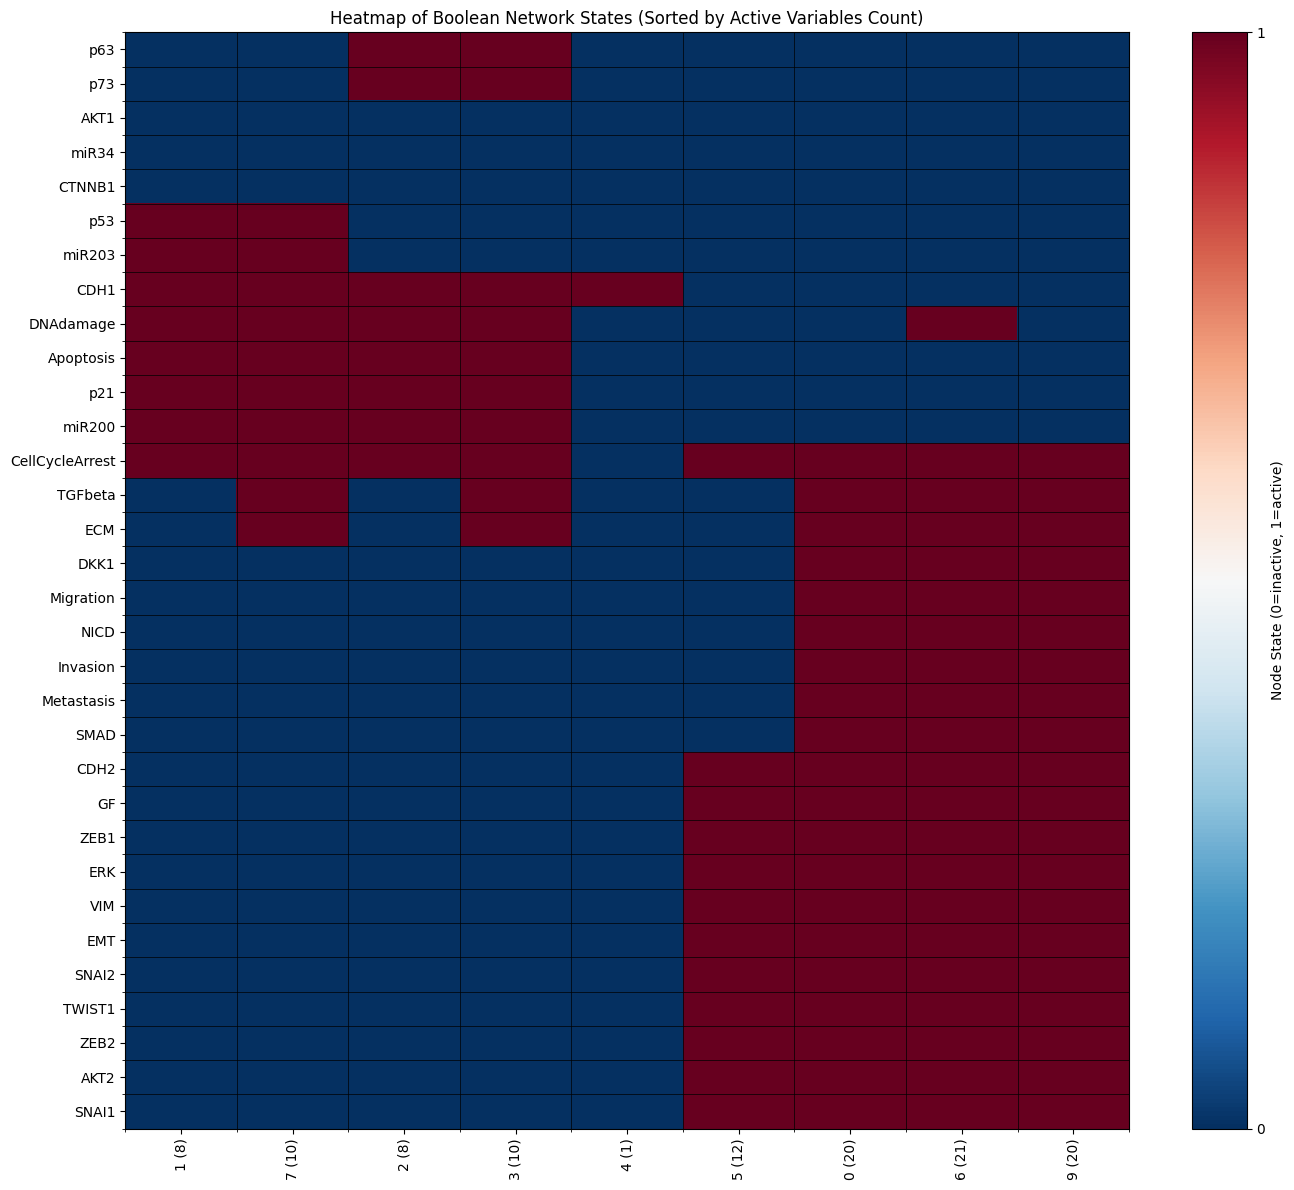

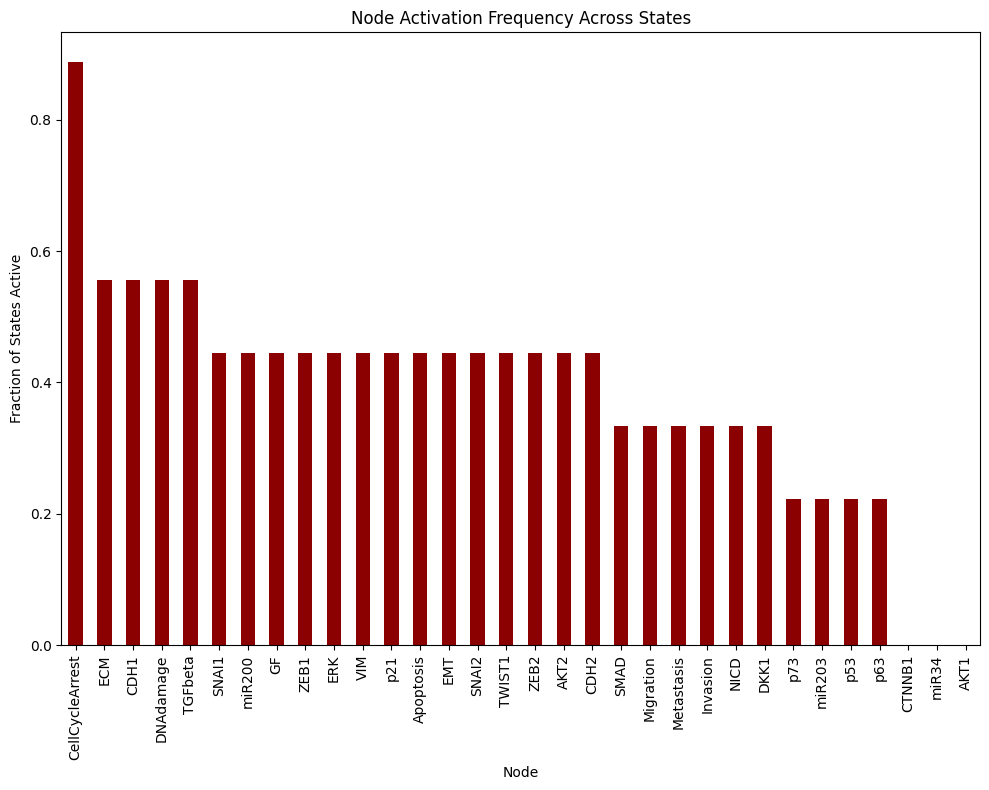

,TGFbeta,miR34,AKT2,SNAI1,Metastasis,p63,CellCycleArrest,p21,ZEB2,p73,...,miR200,NICD,GF,AKT1,Migration,Apoptosis,miR203,CDH2,DKK1,Count
0,1,0,1,1,1,0,1,0,1,0,...,0,1,1,0,1,0,0,1,1,18
1,0,0,0,0,0,0,1,1,0,0,...,1,0,0,0,0,1,1,0,0,36
2,0,0,0,0,0,1,1,1,0,1,...,1,0,0,0,0,1,0,0,0,33
3,1,0,0,0,0,1,1,1,0,1,...,1,0,0,0,0,1,0,0,0,33
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,0,1,0,0,0,1,1,1,0,1,...,1,0,0,0,0,1,0,0,0,1
144,0,1,0,0,0,0,1,1,0,0,...,1,0,0,0,0,1,1,0,0,1
145,1,1,0,0,0,0,1,1,0,0,...,1,0,0,0,0,1,1,0,0,1
146,1,1,0,0,0,1,1,1,0,1,...,1,0,0,0,0,1,0,0,0,1


In [2]:
full_model.robustness()